Практична робота 6_1

Завдання 1

1.	Побудувати стовпчасту діаграму за допомогою бібліотеки Altair (Python). Для цієї діаграми потрібно використовувати датасет source = data.wheat()
У діаграмі кожен стовпчик відповідає року, і його висота відображає кількість пшениці. Якщо рік дорівнює 1810, то відповідний стовпчик буде виділено помаранчевим кольором, в інших випадках - синім.


In [12]:
import altair as alt
import pandas as pd
from vega_datasets import data
source = data.wheat()
chart = alt.Chart(source).mark_bar().encode(
    x='year:O',
    y='wheat:Q',
    color=alt.condition(
        alt.datum.year == 1810,
        alt.value('orange'),
        alt.value('blue'))).properties(width=600)
chart

alt.Chart(...)

2.	Побудувати стовпчасту діаграму допомогою бібліотеки Altair. Для цього завдання вам потрібно використовувати датасет source = data.wheat().
Вимоги:
Створіть стовпчасту діаграму, де на осі X будуть роки, а на осі Y - кількість виробленої пшениці в мільйонах тонн.
Встановіть правило (horizontal rule) червоного кольору, яке показує середнє значення виробництва пшениці за всі роки.
Об'єднайте графік стовпчатої діаграми та правило в одному зображенні шириною 600 пікселів.
Забезпечте наявність легенди, що пояснює, як відображається середнє значення.
Збережіть графік у файлі з розширенням на вибір.


In [13]:
source = data.wheat()
bars = alt.Chart(source).mark_bar().encode(
    x='year:O',
    y='wheat:Q'
).properties(
    width=600,
    title='Кількість виробленої пшениці за роками'
)
mean_rule = alt.Chart(source).mark_rule(color='red').encode(
    y='mean(wheat):Q' 
)
chart = (bars + mean_rule).properties(
    title='Кількість виробленої пшениці з правилом середнього значення',
    width=600
)
chart.save('chart.html')
chart

alt.LayerChart(...)

3.	Побудувати  інтерактивний графік, використовуючи бібліотеку Altair .  Використовувати датасет source = data.stocks()
Тип графіка лінійний, з маркерами.
Вимоги:
На осі X буде відображено часові мітки (дата та час), на осі Y - ціни акцій, а кожна лінія буде представляти окрему компанію.
Визначте кожну лінію графіка за допомогою кольорів
Додайте точки на графіку, які відображають конкретні значення цін акцій у визначені моменти часу.
Додайте легенду, що пояснює, яка лінія відповідає кожній компанії.
Збережіть графік у файл.


In [14]:
source = data.stocks()

# Побудова графіка
chart = alt.Chart(source).mark_line(point=True).encode(
    x='date:T',
    y='price:Q',
    color='symbol:N',
    tooltip=['date:T', 'price:Q', 'symbol:N']
).properties(
    width=600,
    height=400,
    title='Ціни акцій різних компаній у часі'
).interactive()

# Відображення легенди
chart = chart.encode(
    color=alt.Color('symbol:N', legend=alt.Legend(title='Компанія'))
)

# Збереження графіку у файл
chart.save('stocks_chart.html')

# Відображення графіку
chart

alt.Chart(...)

Практична робота 6_2. Візуалізація з бібліотекою Альтаір

Завдання 3

	Побудуйте звичайну лінійну діаграму на основі  pd.DataFrame з двома стовпцями за допомогою бібліотеки Altair для функції y=x cos⁡x для значень x в діапазоні від 0 до 99. Додайте відповідні мітки для вісей x та y на діаграмі. Підпишіть вісі і назву графіку.

In [16]:
import pandas as pd
import altair as alt
import numpy as np
x = np.arange(0, 100)
y = x * np.cos(x)
data = pd.DataFrame({'x': x, 'y': y})
chart = alt.Chart(data).mark_line().encode(
    x='x',
    y='y'
).properties(
    title='Графік функції y = x * cos(x)',
    width=600,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)
chart = chart.encode(
    x=alt.X('x', axis=alt.Axis(title='Значення x')),
    y=alt.Y('y', axis=alt.Axis(title='Значення y'))
)
chart

alt.Chart(...)

2.	Створіть горизонтальну діаграму з мітками на основі даних про врожайність пшениці (data.wheat()) за допомогою бібліотеки  Altair. Задайте вісь x для врожайності пшениці, вісь y для років, а текстові мітки відображайте значення врожайності пшениці на відповідних роках. 

In [18]:
from vega_datasets import data
source = data.wheat()
chart = alt.Chart(source).mark_bar().encode(
    x=alt.X('wheat:Q', axis=alt.Axis(title='Врожайність пшениці')),
    y=alt.Y('year:O', axis=alt.Axis(title='Рік'), sort=None),
    text='wheat:Q',
).properties(
    title='Врожайність пшениці за роками',
    width=1000,
    height=1000
)
text = chart.mark_text(
    align='left',
    baseline='middle',    
).encode(
    text='wheat:Q'
)
(chart + text).configure_axis(
    labelFontSize=12,
    titleFontSize=14,
).configure_title(
    fontSize=16
)

alt.LayerChart(...)

3.	Побудуйте гістограму із від'ємними значеннями на основі даних про зміни в зайнятості в США (data.us_employment()) за допомогою бібліотеки Altair. Вісь x відповідає місяцям, вісь y відображає зміни в зайнятості (nonfarm_change). Використовуйте два різних кольори для відображення від'ємних та додатних значень змін в зайнятості. Встановіть ширину діаграми на 500 пікселів.

In [19]:
from vega_datasets import data
df = data.us_employment()
data = pd.DataFrame(df)
chart = alt.Chart(data).mark_bar().encode(
    x='month:T',
    y=alt.Y('nonfarm_change:Q', axis=alt.Axis(title='Зміни в зайнятості')),
    color=alt.condition(
        alt.datum.nonfarm_change < 0,
        alt.value('red'),  
        alt.value('blue')  
    )
).properties(width=500)
chart

alt.Chart(...)

4.	Побудуйте гістограму з групуванням на основі даних про врожай ячменю (data.barley()). Вісь x представляє роки, вісь y відображає сумарний врожай (yield), кольорова шкала вказує на різні роки, а групування (стовпці) відбувається за різними місцями (site).

In [20]:
from vega_datasets import data
df = data.barley()
data = pd.DataFrame(df)
chart = alt.Chart(data).mark_bar().encode(
    x='year:N',
    y='sum(yield):Q',
    color='year:N',
    column='site:N'
).properties(width=200)
chart

alt.Chart(...)

5.	Створіть багатошарову діаграму на основі даних про виробництво електроенергії в штаті Айова (data.iowa_electricity()). Вісь x представляє роки, вісь y відображає чисте виробництво електроенергії (net_generation), а кожен шар діаграми позначає різні джерела енергії (source). Встановіть прозорість (opacity) для стовпців на рівні 0.7.

In [21]:
from vega_datasets import data
df = data.iowa_electricity()
data = pd.DataFrame(df)
chart = alt.Chart(data).mark_bar(opacity=0.7).encode(
    x='year:T',
    y='net_generation:Q',
    color='source:N',
    column='source:N'
).properties(width=600)
chart

alt.Chart(...)

6.	Побудуйте лінійний графік з маркерами на основі даних про акції (data.stocks()) . Вісь x представляє дати, вісь y відображає ціни акцій (price), а кожен графік позначається символом (symbol). Встановіть маркери як неповні, заповнюючи їх білим кольором, та використовуйте різні кольори для різних символів акцій.

In [22]:
from vega_datasets import data
df = data.stocks()
data = pd.DataFrame(df)
chart = alt.Chart(data).mark_line(point=True, filled=True, color='white', strokeWidth=2).encode(
    x='date:T',
    y='price:Q',
    color='symbol:N'
).properties(width=600)
chart

alt.Chart(...)

7.	Створіть діаграму розсіювання для двовимірної гістограми на основі даних про фільми (data.movies.url). Вісь X відображає рейтинг фільмів на IMDB (IMDB_Rating), вісь Y відображає рейтинг фільмів на Rotten Tomatoes (Rotten_Tomatoes_Rating). 

In [25]:
import pandas as pd
import altair as alt
import numpy as np
data = pd.read_csv('global_education.csv', encoding='latin1')
scatter_plot = alt.Chart(data).mark_circle().encode(
    x='IMDB_Rating:Q',
    y='Rotten_Tomatoes_Rating:Q'
).properties(
    width=600,
    height=400
)

scatter_plot

alt.Chart(...)

Завдання 4

In [26]:
import pandas as pd
df = pd.read_csv("Global_Education.csv",encoding='latin-1')

1. Описовий аналіз:
1.	Вивести перші 5 та останні 5 рядків датасету.
2.	Вивести основну статистичну інформацію про числові стовпці, таку як середнє значення, медіану, мінімум, максимум.


In [27]:
# Розмір датасету
print("Розмір датасету:", df.shape)

# Типи даних та наявність пропусків
print("\nТипи даних та пропуски:")
print(df.info())

# Перевірка на дублікати
print("\nКількість дублікатів:", df.duplicated().sum())

# Виведення назв стовпців
print("\nНазви стовпців:")
print(df.columns)

# Описовий аналіз
print("\nПерші 5 рядків:")
print(df.head())

print("\nОстанні 5 рядків:")
print(df.tail())


Розмір датасету: (202, 29)

Типи даних та пропуски:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries and areas                      202 non-null    object 
 1   Latitude                                 202 non-null    float64
 2   Longitude                                202 non-null    float64
 3   OOSR_Pre0Primary_Age_Male                202 non-null    int64  
 4   OOSR_Pre0Primary_Age_Female              202 non-null    int64  
 5   OOSR_Primary_Age_Male                    202 non-null    int64  
 6   OOSR_Primary_Age_Female                  202 non-null    int64  
 7   OOSR_Lower_Secondary_Age_Male            202 non-null    int64  
 8   OOSR_Lower_Secondary_Age_Female          202 non-null    int64  
 9   OOSR_Upper_Secondary_Age_Male            202 non-null    int64  
 10

#2 Вивести основну статистичну інформацію про числові стовпці, таку як середнє значення, медіану, мінімум, максимум..


In [29]:
mean_values = df.mean()
print("Середнє значення:")
print(mean_values)

# Медіана кожного числового стовпця
median_values = df.median()
print("\nМедіана:")
print(median_values)

# Мінімум кожного числового стовпця
min_values = df.min()
print("\nМінімум:")
print(min_values)

# Максимум кожного числового стовпця
max_values = df.max()
print("\nМаксимум:")
print(max_values)


TypeError: Could not convert ['AfghanistanAlbaniaAlgeriaAndorraAngolaAnguillaAntigua and BarbudaArgentinaArmeniaAustraliaAustriaAzerbaijanThe BahamasBahrainBangladeshBarbadosBelarusBelgiumBelizeBeninBhutanBoliviaBosnia and HerzegovinaBotswanaBrazilBritish Virgin IslandsBruneiBulgariaBurkina FasoBurundiCape VerdeCambodiaCameroonCanadaCentral African RepublicChadChileChinaColombiaComorosRepublic of the CongoCook IslandsCosta RicaIvory CoastCroatiaCubaCyprusCzech RepublicNorth KoreaDemocratic Republic of the CongoDenmarkDjiboutiDominicaDominican RepublicEcuadorEgyptEl SalvadorEquatorial GuineaEritreaEstoniaEswatiniEthiopiaFijiFinlandFranceGabonThe GambiaGeorgiaGermanyGhanaGreeceGrenadaGuatemalaGuineaGuinea0BissauGuyanaHaitiVatican CityHondurasHungaryIcelandIndiaIndonesiaIranIraqRepublic of IrelandIsraelItalyJamaicaJapanJordanKazakhstanKenyaKiribatiKuwaitKyrgyzstanLaosLatviaLebanonLesothoLiberiaLibyaLiechtensteinLithuaniaLuxembourgMadagascarMalawiMalaysiaMaldivesMaliMaltaMarshall IslandsMauritaniaMauritiusMexicoFederated States of MicronesiaMonacoMongoliaMontenegroMontserratMoroccoMozambiqueMyanmarNamibiaNauruNepalNetherlandsNew ZealandNicaraguaNigerNigeriaNiueNorth MacedoniaNorwayOmanPakistanPalauPanamaPapua New GuineaParaguayPeruPhilippinesPolandPortugalQatarSouth KoreaMoldovaRomaniaRussiaRwandaSaint Kitts and NevisSaint LuciaSaint Vincent and the GrenadinesSamoaSan MarinoSï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿Saudi ArabiaSenegalSerbiaSeychellesSierra LeoneSingaporeSlovakiaSloveniaSolomon IslandsSomaliaSouth AfricaSouth SudanSpainSri LankaPalestinian National AuthoritySudanSurinameSwedenSwitzerlandSyriaTajikistanThailandEast TimorTogoTokelauTongaTrinidad and TobagoTunisiaTurkeyTurkmenistanTurks and Caicos IslandsTuvaluUgandaUkraineUnited Arab EmiratesUnited KingdomTanzaniaUnited StatesUruguayUzbekistanVanuatuVenezuelaVietnamYemenZambiaZimbabwe'] to numeric

2.Робота з числовими даними:
1.Знайти середнє значення та стандартне відхилення для кількох числових стовпців, таких як ' Longitude', 'Birth_Rate'.
2. Визначити країну з найвищим та найнижчим рівнем безробіття ('Unemployment_Rate').


In [30]:
# Середнє значення для обраних числових стовпців
mean_longitude = df['Longitude'].mean()
mean_birth_rate = df['Birth_Rate'].mean()

# Стандартне відхилення для обраних числових стовпців
std_longitude = df['Longitude'].std()
std_birth_rate = df['Birth_Rate'].std()

# Виведення результатів
print("Середнє значення для Longitude:", mean_longitude)
print("Стандартне відхилення для Longitude:", std_longitude)

print("\nСереднє значення для Birth_Rate:", mean_birth_rate)
print("Стандартне відхилення для Birth_Rate:", std_birth_rate)


Середнє значення для Longitude: 55.1669281450495
Стандартне відхилення для Longitude: 45.97628733631503

Середнє значення для Birth_Rate: 18.9140099009901
Стандартне відхилення для Birth_Rate: 10.828183893329582


In [31]:
# Країна з найвищим рівнем безробіття
highest_unemployment_country = df.loc[df['Unemployment_Rate'].idxmax(), 'Countries and areas']
highest_unemployment_rate = df['Unemployment_Rate'].max()

# Країна з найнижчим рівнем безробіття
lowest_unemployment_country = df.loc[df['Unemployment_Rate'].idxmin(), 'Countries and areas']
lowest_unemployment_rate = df['Unemployment_Rate'].min()

# Виведення результатів
print("Країна з найвищим рівнем безробіття:", highest_unemployment_country)
print("Найвищий рівень безробіття:", highest_unemployment_rate)

print("\nКраїна з найнижчим рівнем безробіття:", lowest_unemployment_country)
print("Найнижчий рівень безробіття:", lowest_unemployment_rate)


Країна з найвищим рівнем безробіття: South Africa
Найвищий рівень безробіття: 28.18

Країна з найнижчим рівнем безробіття: Andorra
Найнижчий рівень безробіття: 0.0


3. Робота з категоріальними даними:
1. Вивести унікальні значення стовпця 'Countries and areas'.
2. Порахувати кількість країн у датасеті.


In [32]:
unique_countries = df['Countries and areas'].unique()
print(unique_countries)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'The Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cape Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Republic of the Congo' 'Cook Islands' 'Costa Rica' 'Ivory Coast'
 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'North Korea'
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'The Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea0Bissau' 'Guyana' 'Haiti' 'Vatican City'
 'Honduras' 'Hungary' 'Iceland' 'India' '

In [33]:
num_countries = df['Countries and areas'].nunique()
print("Кількість країн у датасеті:", num_countries)

Кількість країн у датасеті: 202


4. Візуалізація даних:
1. Побудувати графік розсіювання між 'Gross_Primary_Education_Enrollment' та 'Gross_Tertiary_Education_Enrollment'.
2. Порівняти рейтинги грамотності чоловіків та жінок ('Youth_15_24_Literacy_Rate_Male' та 'Youth_15_24_Literacy_Rate_Female') за допомогою горизонтальної стовпчастої діаграми.


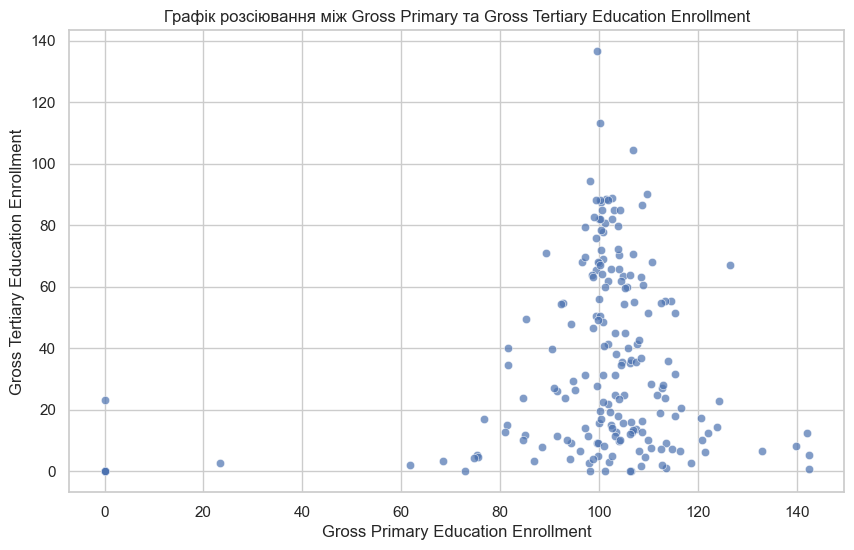

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gross_Primary_Education_Enrollment', y='Gross_Tertiary_Education_Enrollment', data=df, alpha=0.7)

plt.title('Графік розсіювання між Gross Primary та Gross Tertiary Education Enrollment')
plt.xlabel('Gross Primary Education Enrollment')
plt.ylabel('Gross Tertiary Education Enrollment')

plt.show()

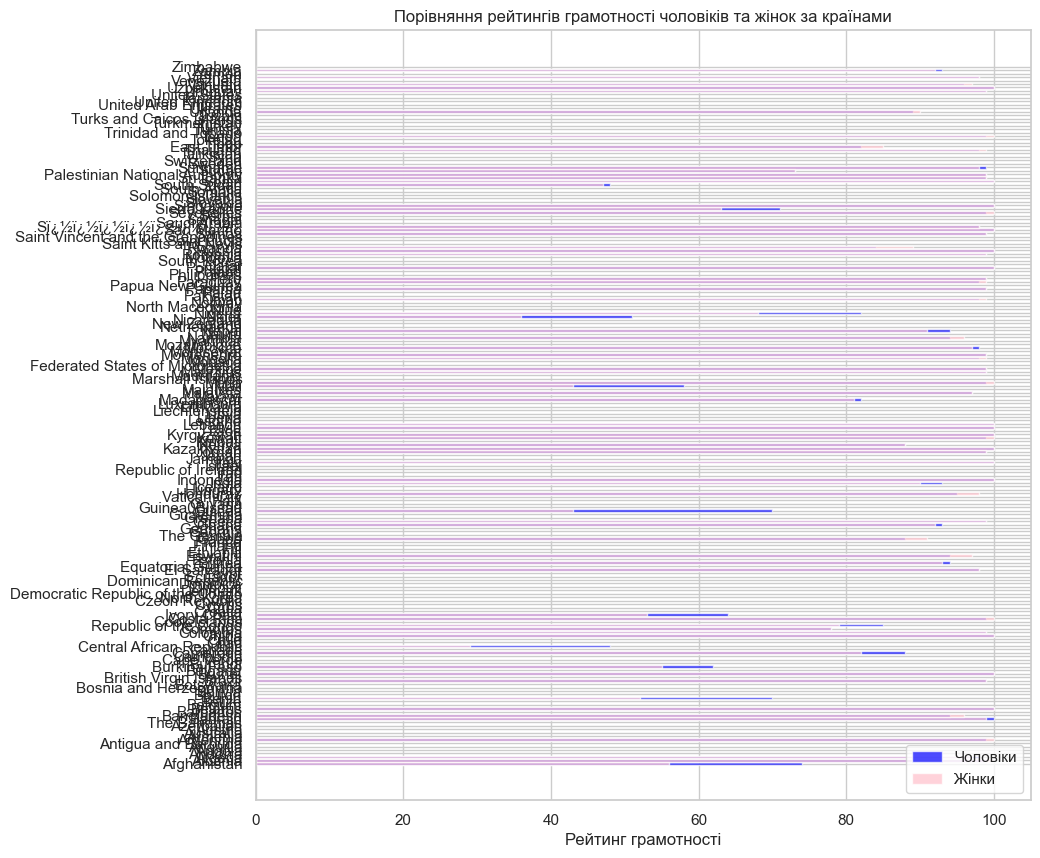

In [36]:
# Дані для порівняння
literacy_rate_male = df['Youth_15_24_Literacy_Rate_Male']
literacy_rate_female = df['Youth_15_24_Literacy_Rate_Female']
countries = df['Countries and areas']

# Побудова горизонтальної стовпчастої діаграми
plt.figure(figsize=(10, 10))
plt.barh(countries, literacy_rate_male, color='blue', label='Чоловіки', alpha=0.7)
plt.barh(countries, literacy_rate_female, color='pink', label='Жінки', alpha=0.7)

# Додаткові налаштування графіка
plt.xlabel('Рейтинг грамотності')
plt.title('Порівняння рейтингів грамотності чоловіків та жінок за країнами')
plt.legend()

# Показати графік
plt.show()


5. Маніпуляції з даними:
1. Створити новий стовпець 'Total_Literacy_Rate', який буде представляти загальний рейтинг грамотності для кожної країни.
2. Визначити країну з найвищим загальним рейтингом грамотності.



In [37]:
df['Total_Literacy_Rate'] = df['Youth_15_24_Literacy_Rate_Male'] + df['Youth_15_24_Literacy_Rate_Female']

print(df[['Countries and areas', 'Total_Literacy_Rate']])

    Countries and areas  Total_Literacy_Rate
0           Afghanistan                  130
1               Albania                  199
2               Algeria                  195
3               Andorra                    0
4                Angola                    0
..                  ...                  ...
197           Venezuela                    0
198             Vietnam                  196
199               Yemen                    0
200              Zambia                  185
201            Zimbabwe                    0

[202 rows x 2 columns]


In [38]:
highest_literacy_country = df.loc[df['Total_Literacy_Rate'].idxmax(), 'Countries and areas']
highest_literacy_rate = df['Total_Literacy_Rate'].max()

print("Країна з найвищим загальним рейтингом грамотності:", highest_literacy_country)
print("Найвищий загальний рейтинг грамотності:", highest_literacy_rate)

Країна з найвищим загальним рейтингом грамотності: Belarus
Найвищий загальний рейтинг грамотності: 200
